 Advance Deep Learning and Computer Vision                                                                      


#### Project 2
## Perform Facial Recognition with Deep Learning in Keras Using CNN

### Import the required libraries

In [1]:

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

### Loading  the dataset and normalizing the images.

In [2]:
#load dataset
data = np.load('ORL_faces.npz')
x_train = data['trainX']

In [3]:

#normalize every image
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255

In [4]:
# load the Label of Images
y_train= data['trainY']
y_test= data['testY']

In [5]:
# show the train and test Data format
print('x_train : {}'.format(x_train[:]))
print('x_train shape : {}'.format(x_train.shape))

print('Y-train : {}'.format(y_train))
print('Y-train shape: {}'.format(y_train.shape))
print('x_test shape: {}'.format(x_test.shape))

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
x_train shape : (240, 10304)
Y-train : [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13

### Split the dataset 
#### ( Validate and train the data )


In [6]:
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.05, random_state=20,)

##Change the size of the images

For using the CNN, you need to change the size of images. Transform the images to equal sizes to feed in CNN.


In [7]:
im_rows=112
im_cols=92
batch_size=24
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))

x_train shape: (228, 112, 92, 1)
x_test shape: (160, 112, 92, 1)


### Build a CNN model that has 3 main layers
 
 1. Convolotional Layer 
 2. Pooling Layer  
 3. Fully Connected Layer

In [8]:
cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(20, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

[2021-03-24 04:23:03.525 tensorflow-2-3-gpu--ml-g4dn-xlarge-c85184389676cdfa7bdf06745c9b:1519 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2021-03-24 04:23:03.551 tensorflow-2-3-gpu--ml-g4dn-xlarge-c85184389676cdfa7bdf06745c9b:1519 INFO profiler_config_parser.py:102] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.


### Show the model Summary.

In [9]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 106, 86, 36)       1800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 53, 43, 36)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 39, 54)        48654     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 19, 54)        0         
_________________________________________________________________
flatten (Flatten)            (None, 24624)             0         
_________________________________________________________________
dense (Dense)                (None, 2024)              49841000  
_________________________________________________________________
dropout (Dropout)            (None, 2024)              0

### Train the model

In [10]:
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=24,
    epochs=100, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/100
10/10 - 1s - loss: 3.1200 - accuracy: 0.0526 - val_loss: 3.0410 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 - 0s - loss: 3.0359 - accuracy: 0.0439 - val_loss: 3.0095 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 - 0s - loss: 2.9921 - accuracy: 0.0702 - val_loss: 2.9920 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 - 0s - loss: 2.9817 - accuracy: 0.0789 - val_loss: 2.9779 - val_accuracy: 0.2500
Epoch 5/100
10/10 - 0s - loss: 2.9742 - accuracy: 0.1096 - val_loss: 2.9626 - val_accuracy: 0.2500
Epoch 6/100
10/10 - 0s - loss: 2.9559 - accuracy: 0.1272 - val_loss: 2.9313 - val_accuracy: 0.4167
Epoch 7/100
10/10 - 0s - loss: 2.9161 - accuracy: 0.1140 - val_loss: 2.8660 - val_accuracy: 0.3333
Epoch 8/100
10/10 - 0s - loss: 2.8429 - accuracy: 0.1491 - val_loss: 2.8030 - val_accuracy: 0.3333
Epoch 9/100
10/10 - 0s - loss: 2.8114 - accuracy: 0.1842 - val_loss: 2.6857 - val_accuracy: 0.2500
Epoch 10/100
10/10 - 0s - loss: 2.7347 - accuracy: 0.1754 - val_loss: 2.5180 - val_accuracy: 0.25

### Evaluate the test data


In [11]:
score = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test los {:.4f}'.format(score[0]))
print('test acc {:.4f}'.format(score[1]))

test los 0.4311
test acc 0.9062


### Plot the result

In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


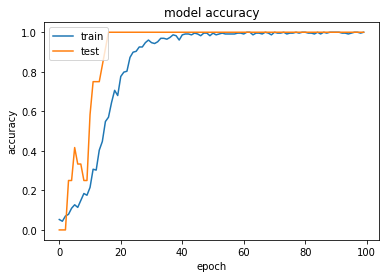

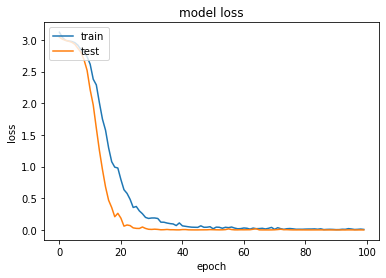

In [13]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Plot the Confusion matrix

In [15]:
predicted =np.array( cnn_model.predict(x_test))

In [16]:
print(predicted)

[[9.61878717e-01 1.50003871e-02 6.92085450e-07 ... 3.89940142e-05
  9.57194343e-03 1.16480594e-04]
 [9.64621067e-01 9.89409891e-05 1.90520293e-08 ... 2.39355013e-05
  3.98121010e-05 4.52576978e-06]
 [9.27619338e-01 3.13056575e-04 5.17530789e-05 ... 5.59864938e-03
  5.99055376e-04 3.05532361e-04]
 ...
 [2.41528966e-07 4.19061081e-07 4.05769587e-01 ... 1.76335336e-04
  9.91468596e-09 3.92065674e-01]
 [2.65031090e-08 2.66672401e-07 7.82576054e-02 ... 2.54143242e-06
  2.81993828e-09 9.18095589e-01]
 [8.33695526e-13 9.09422676e-11 1.44462539e-10 ... 2.31196694e-11
  3.32153975e-14 1.00000000e+00]]


In [17]:
print(y_test)

[ 0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14
 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19]


In [18]:
ynew = cnn_model.predict_classes(x_test)

### Check the Accuracy 

In [19]:
Acc=accuracy_score(y_test, ynew)
print("accuracy : ")
print(Acc)

accuracy : 
0.90625


In [20]:
cnf_matrix=confusion_matrix(np.array(y_test), ynew)

In [21]:
y_test1 = np_utils.to_categorical(y_test, 20)

Confusion matrix, without normalization
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 4 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7]]
Confusion matrix, without normalization


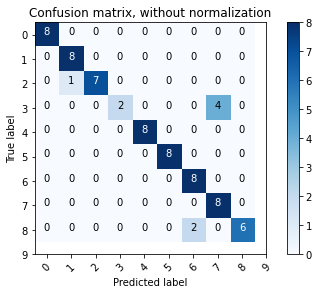

Confusion matrix, without normalization


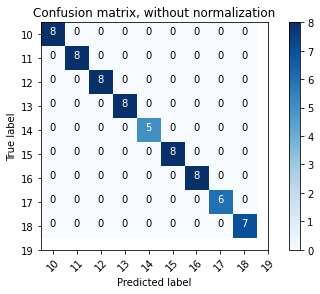

Confusion matrix:
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 4 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1

In [55]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


print('Confusion matrix, without normalization')
print(cnf_matrix)

plt.figure()
plot_confusion_matrix(cnf_matrix[1:10,1:10], classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix[11:20,11:20], classes=[10,11,12,13,14,15,16,17,18,19],
                      title='Confusion matrix, without normalization')

print("Confusion matrix:\n%s" % confusion_matrix(np.array(y_test), ynew))
print(classification_report(np.array(y_test), ynew))

### The Finale Output is ...




### ---- The Project End. ----